# Problem Set 4, due '05/23/2017' at 3:30pm.

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions.
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 3.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [3]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from decimal import Decimal
import statsmodels.formula.api as smf
import time

In [4]:
from sklearn.datasets import load_boston
bdata = load_boston()


---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [5]:
# uncomment the following if you want to see a lengthy description of the dataset
# print ("keys:", bdata.keys())
print ("feature names:",  bdata.feature_names)
# print "data shape:", bdata.data.shape
# print "target shape", bdata.target.shape
# print (bdata.DESCR)
# print "-"*80

feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#create a data frame
#save the data into easily accessible variable
data = pd.DataFrame(bdata.data)
target = pd.DataFrame(bdata.target)

#join data and target variable
data = pd.concat((data,target), axis = 1)

#save the column names
cols = np.append(bdata.feature_names,'MEDV')

data.columns = cols

data.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
#regressing the housing price on the number of rooms per house
linReg = smf.ols(formula  = 'MEDV ~ RM',  data = data ).fit()

coefLinReg = linReg.params[1]

linReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 19 May 2017   Prob (F-statistic):           2.49e-74
Time:                        14:38:57   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#regressing the housing price on the number of rooms per house and the (number of rooms per house) squared
sqLinReg = smf.ols(formula  = 'MEDV ~ RM + I(RM**2)',  data = data ).fit()

coefSqLinReg = sqLinReg.params[1]

sqLinReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     305.4
Date:                Fri, 19 May 2017   Prob (F-statistic):           1.46e-87
Time:                        14:38:57   Log-Likelihood:                -1639.1
No. Observations:                 506   AIC:                             3284.
Df Residuals:                     503   BIC:                             3297.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.0588     12.104      5.458      0.000      42.278      89.839
RM           -22.6433      3.754     -6.031      0.000     -30.019     -15.267
I(RM ** 2)     2.4701      0.291      8.502      0.000       1.899       3.041
==============================================================================
Omnibus:                       82.173   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.337
Skew:                           0.224   Prob(JB):                    1.29e-203
Kurtosis:                       9.642   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house.
Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 250 slope coefficients, and draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

Note: please use 'random_state=1' and keep 'shuffle=False' when doing the KFold splitting to ensure reproducibility!

In [9]:
#create folds
folds = KFold(n_splits=250,shuffle=False,random_state=1)

#create parameter list
param_list = []

#run regression and store the parameters
for train, test in folds.split(data):
    l = smf.ols(formula = 'MEDV ~ RM', data = data.ix[train,] ).fit()
    param_list.append(l.params[1])

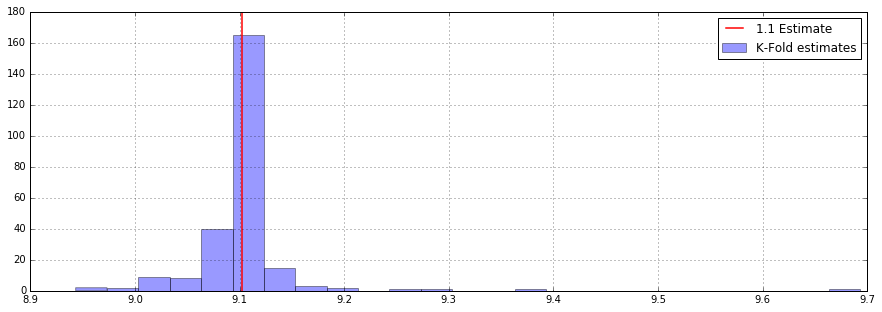

In [10]:
#increase the plotsize
plt.figure(figsize=(15,5))

#create a histogram
plt.hist(param_list, bins =25,alpha = 0.4, label = "K-Fold estimates")

#plot the vertical line
plt.axvline(coefLinReg, color = 'r', lw = 1.5, label = "1.1 Estimate")

#show legends
plt.legend()

#show grids
plt.grid()

In [11]:
#create folds
folds = KFold(n_splits=250,shuffle=False,random_state=1)
#create parameter list
param_list = []

#run regression and store all run parameters
for train, test in folds.split(data):
    l = smf.ols(formula = 'MEDV ~ RM + I(RM ** 2)', data = data.ix[train,] ).fit()
    param_list.append(l.params[1])

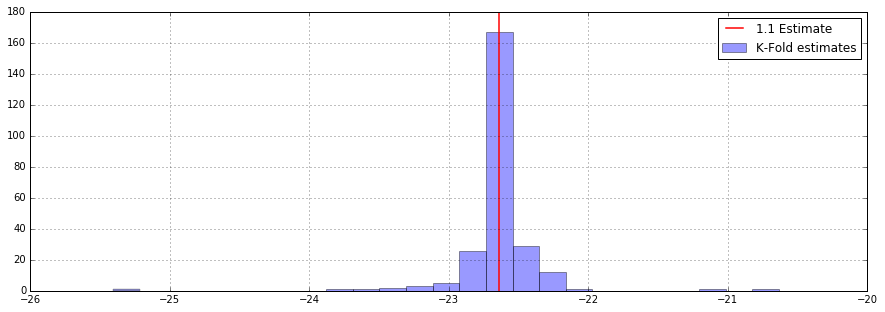

In [12]:
#increase the plotsizr
plt.figure(figsize=(15,5))
#plot histogram
plt.hist(param_list, bins =25,alpha = 0.4, label = "K-Fold estimates")
#plot vertical line
plt.axvline(coefSqLinReg, color = 'r', lw = 1.5, label = "1.1 Estimate")
#show legends
plt.legend()
#show grids
plt.grid()

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

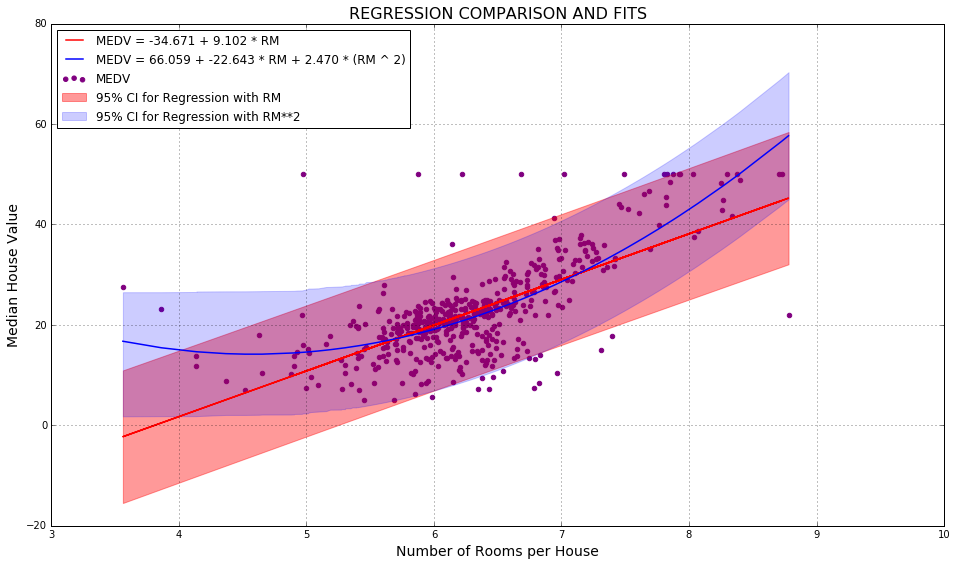

In [13]:
#sort the array for the plot
RM  = np.array(sorted(data.RM))

#get the confidence intervals for each regression 
linRegStd,linRegLower,linRegUpper = wls_prediction_std(linReg)
sqLinRegStd,sqLinRegLower,sqLinRegUpper = wls_prediction_std(sqLinReg)

#set the plot size
plt.figure(figsize=(16,9))

#initial scatter plot
plt.scatter(data.RM,data.MEDV, color = 'purple', label = 'MEDV')

#linear reg with RM
plt.plot(data.RM,linReg.params[0] + (coefLinReg * data.RM)
         ,lw = 1.5, color = 'r',label = 'MEDV = %0.3f + %0.3f * RM' % (linReg.params[0],linReg.params[1]))
         
#Confidence Interval area
plt.fill_between(RM,sorted(linRegLower),sorted(linRegUpper),color = 'r',alpha = 0.4,  label = "95% CI for Regression with RM")

#linear reg with RM**2
plt.plot(RM,sqLinReg.params[0] + (sqLinReg.params[1] * RM) + (sqLinReg.params[2] * (RM**2))
         , lw = 1.5,color = 'b',
         label = 'MEDV = %0.3f + %0.3f * RM + %0.3f * (RM ^ 2)' % (sqLinReg.params[0],sqLinReg.params[1],sqLinReg.params[2]))

#Confidence Interval area         
plt.fill_between(RM,sorted(sqLinRegLower),sorted(sqLinRegUpper),color = 'b',alpha = 0.2, label = "95% CI for Regression with RM**2")

#plot the titles, axis - lables
plt.title('REGRESSION COMPARISON AND FITS', fontsize = 16)
plt.xlabel('Number of Rooms per House', fontsize = 14)
plt.ylabel('Median House Value', fontsize = 14)

#show legend
plt.legend(loc = 'upper left')

#show grid
plt.grid()

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: It is always useful to include maximum number of iterations, otherwise a rogue estimation may go on forever.*

In [16]:
def bivariate_ols (xvalues,yvalues,R,MaxIterations):
    """
        Function
        --------
        bivariate_ols: Gradient Decent to minimize OLS. Used to find coefficients of bivariate OLS Linear regression

        Parameters
        ----------
        xvalues, yvalues : narray xvalues: independent variable; yvalues: dependent variable
        R: float, Learning rate
        MaxIterations: Int, maximum number of iterations

        Returns
        -------
        alpha: float, intercept
        beta: float, co-efficient
        ttaken: time taken
        it: number of iterations
        convergence: logical, convergence achieved?
    """
    
    #convert for easy notations
    X = xvalues
    y = yvalues
    
    #set convergence
    convergence = False
    
    #set it to MaxIterations
    it = MaxIterations
    
    #set previous loss to Inf
    prevLoss = float('Inf')
    
    print('-----------------------------------------------------------------------------------')
    print('Running Gradient Descent with %0.4f as learning rate and %d maximum iterations' % (R,MaxIterations))
    
    #initialize betas with initial weights as 0
    beta = np.array([0.00000] * X.shape[1])
    
    #reshape 
    beta = beta.reshape(X.shape[1],1)
    
    #start the time
    t = time.time()
    
    #start gradient descent 
    for i in range(1,MaxIterations):
        
        #calculate predictions
        predictions = np.dot(X,beta)
        
        #find the difference to reduce the number of calculations
        diff = predictions - y
        
        #calculate the sum of squared errors
        loss = np.dot(diff.T,diff)
        
        #compute the gradient
        gradient = (np.dot(X.T,diff)*(2 / X.shape[0]))
        
        #update beta
        beta = beta - (R*gradient)
        
        #check if the derivative/slope/gradient is near zero
        if np.asscalar(sum((abs(gradient)) < 0.0001) >0 ):
            print('Convergence achieved after %d iterations' % i)
            it = i
            #set the flag to true
            convergence = True
            break
        
        if (prevLoss - np.asscalar(loss)) < 0.000001:
            print('The loss remains same after %d iterations'% i)
            it = i
            break
        else:
            prevLoss = np.asscalar(loss)
            
    #stop the timer
    ttaken = float(time.time() - t)
    
    #print message accordingly if/not converged
    if convergence:
        print('Time taken for convergence %0.4f' % ttaken)
    else:
        print('Time taken for maximum iterations %0.4f' % ttaken)
    #show values of betas
    print("The values of intercept is %0.5f and slope is %0.5f " %(beta[0,0], beta[1,0]))
    print('\n')
    return beta[1,0],beta[0,0],ttaken,it,convergence

In [17]:
#introduce constant
data['CONST'] = 1

#select the features we want to run gradient descent
features = ['RM']

#append the constant
features = ['CONST'] + features

#set the target 
target = 'MEDV'

#subset data and convert to matrix
y = np.matrix(data[target].values).T
X = data.as_matrix(features)

#run Gradient Descent  with learning rate as 0.005 and 1000000 iterations
gd_run1 = bivariate_ols(X,y,0.005,1000000)

#run Gradient Descent  with learning rate as 0.003 and 100000 iterations
gd_run2 = bivariate_ols(X,y,0.003,100000)

#run Gradient Descent  with learning rate as 0.02 and 100000 iterations
gd_run3 = bivariate_ols(X,y,0.02,100000)

-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0050 as learning rate and 1000000 maximum iterations
Convergence achieved after 59833 iterations
Time taken for convergence 6.4716
The values of intercept is -34.64417 and slope is 9.09795 


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0030 as learning rate and 100000 maximum iterations
The loss remains same after 96515 iterations
Time taken for maximum iterations 10.1229
The values of intercept is -34.63728 and slope is 9.09687 


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0200 as learning rate and 100000 maximum iterations
Convergence achieved after 14957 iterations
Time taken for convergence 1.5771
The values of intercept is -34.64419 and slope is 9.09795 




### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [18]:
def standardize(raw_data):
    """
    standardizes raw data and returns
    standardized data, mean by column, sd by column
    """
    mu = np.mean(raw_data, axis = 0)
    sd = np.std(raw_data, axis = 0)
    return (raw_data - mu) / sd, mu, sd


In [19]:
#normalize the entire dataset
norm_data = standardize(data)

#store only the dataset
norm_data = norm_data[0]

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with the following values of R: 0.1, 0.01, and 0.001.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [51]:
def multiple_ols (xvalues,yvalues,R,MaxIterations):
    """
    Function
    --------
    multiple_ols
        Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

    Parameters
    ----------
    xvalue_matrix, yvalues : narray
        xvalue_matrix: independent variable
        yvalues: dependent variable

    R: float
        Learning rate

    MaxIterations: Int
        maximum number of iterations

    Returns
    -------
    beta: array[float], coefficients
    """
    #convert for easy notations
    X = xvalues
    y = yvalues
    
    #set it to MaxIterations
    it = MaxIterations
    
    #set previous loss to Inf
    prevLoss = float('Inf')
    
    print('-----------------------------------------------------------------------------------')
    print('Running Gradient Descent with %0.4f as learning rate and %d maximum iterations' % (R,MaxIterations))
    
    #initialize betas with initial weights as 0
    beta = np.array([0.00000] * X.shape[1])
    
    #set convergence
    convergence = False
    
    #reshape 
    beta = beta.reshape(X.shape[1],1)
    
    #start the time
    t = time.time()
    
    #start gradient descent 
    for i in range(1,MaxIterations):
        
        #calculate predictions
        predictions = np.dot(X,beta)
        
        #find the difference to reduce the number of calculations
        diff = predictions - y
        
        #calculate the sum of squared errors
        loss = np.dot(diff.T,diff)
        
        #compute the gradient
        gradient = (np.dot(X.T,diff) * (2/ X.shape[0]))
        
        #update beta
        beta = beta - (R*gradient)
        
        #check if the derivative/slope/gradient is near zero
        if np.asscalar(sum((abs(gradient)) < 0.000001) >0 ):
            print('Convergence achieved after %d iterations' % i)
            it = i
            #set the flag to true
            convergence = True
            break
        
        #check if there is any significant difference in the loss 
        if (prevLoss - np.asscalar(loss)) < 0.0001:
            print('The loss remains same after %d iterations' % i)
            it = i
            break
        else:
            prevLoss = np.asscalar(loss)
            
    #stop the timer
    ttaken = float(time.time() - t)
    
    #print message accordingly if/not converged
    if convergence:
        print('Time taken for convergence %0.4f' % ttaken)
    else:
        print('Time taken for maximum iterations %0.4f' % ttaken)
    
    #show values of betas
    betas= np.squeeze(np.asarray(beta))
    
    print("The values of Betas are" , [i for i in betas])
    
    print('\n')
    
    return beta,ttaken,it,convergence, predictions

In [21]:
#norm_data is already normalized. Using the same data for this question
#introduce constant
norm_data['CONST'] = 1

#select the features we want to run gradient descent
features = ['CRIM','RM']

#append the constant
features = ['CONST'] + features

#set the target 
target = 'MEDV'

#subset data and convert to matrix
y = np.matrix(data[target].values).T
X = norm_data.as_matrix(features)

#run Gradient Descent  with learning rate as 0.1 and 1000000 iterations
gd_run1 = multiple_ols(X,y,0.1,100000)

#run Gradient Descent  with learning rate as 0.01 and 1000000 iterations
gd_run2 = multiple_ols(X,y,0.01,100000)

#run Gradient Descent  with learning rate as 0.001 and 1000000 iterations
gd_run3 = multiple_ols(X,y,0.001,100000)


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.1000 as learning rate and 100000 maximum iterations
The loss remains same after 51 iterations
Time taken for maximum iterations 0.0156
The values of Betas are [22.532549044944052, -2.2489257554031092, 5.8940948787532026]


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0100 as learning rate and 100000 maximum iterations
The loss remains same after 469 iterations
Time taken for maximum iterations 0.0781
The values of Betas are [22.531077125875594, -2.2497142498027096, 5.8932358095425954]


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0010 as learning rate and 100000 maximum iterations
The loss remains same after 4100 iterations
Time taken for maximum iterations 0.5227
The values of Betas are [22.526668215595169, -2.2514516564413327, 5.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [22]:
#introduce constant
data['CONST'] = 1

#select the features we want to run gradient descent
features = ['CRIM','RM']

#append the constant
features = ['CONST'] + features

#set the target 
target = 'MEDV'

#subset data and convert to matrix
y = np.matrix(data[target].values).T
X = data.as_matrix(features)

#run Gradient Descent  with learning rate as 0.1 and 1000000 iterations
gd_run1 = multiple_ols(X,y,0.01,100000)

#run Gradient Descent  with learning rate as 0.01 and 1000000 iterations
gd_run2 = multiple_ols(X,y,0.01,100000)

#run Gradient Descent  with learning rate as 0.001 and 1000000 iterations
gd_run3 = multiple_ols(X,y,0.001,100000)

-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0100 as learning rate and 100000 maximum iterations
The loss remains same after 22434 iterations
Time taken for maximum iterations 2.7696
The values of Betas are [-29.105724406650875, -0.26247744011077795, 8.3670749846719001]


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0100 as learning rate and 100000 maximum iterations
The loss remains same after 22434 iterations
Time taken for maximum iterations 3.2590
The values of Betas are [-29.105724406650875, -0.26247744011077795, 8.3670749846719001]


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0010 as learning rate and 100000 maximum iterations
Time taken for maximum iterations 36.4241
The values of Betas are [-26.122289055869253, -0.2724428540470229, 7.9033728664944416]




- Without normalization, it takes more number of iterations to converge. In the last case where learning rate is 0.001, the data that is not normalized does not converge.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multiple regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

In [59]:
#generate indexes
indexes = np.random.choice(506,int(norm_data.shape[0]*0.66),replace=False)

#create train with the random sample graph
norm_train = norm_data.ix[indexes,].reset_index()
norm_train_target = data.ix[indexes,'MEDV'].reset_index()

#select rows not in index
norm_test = norm_data.ix[~norm_data.index.isin(indexes),].reset_index()
norm_test_target = data.ix[~data.index.isin(indexes),'MEDV'].reset_index()

#introduce constant
norm_train['CONST'] = 1

#select the features we want to run gradient descent
features = ['CRIM','RM']

#append the constant
features = ['CONST'] + features

#set the target 
target = 'MEDV'

#subset data and convert to matrix
y = np.matrix(norm_train_target[target].values).T
X = norm_train.as_matrix(features)

#run Gradient Descent  with learning rate as 0.1 and 1000000 iterations
gd_run1 = multiple_ols(X,y,0.1,100000)

#run Gradient Descent  with learning rate as 0.01 and 1000000 iterations
gd_run2 = multiple_ols(X,y,0.01,100000)

#run Gradient Descent  with learning rate as 0.001 and 1000000 iterations
gd_run3 = multiple_ols(X,y,0.001,100000)

-----------------------------------------------------------------------------------
Running Gradient Descent with 0.1000 as learning rate and 100000 maximum iterations
The loss remains same after 48 iterations
Time taken for maximum iterations 0.0089
The values of Betas are [22.340617018908613, -2.4031271575972384, 5.8539403024498524]


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0100 as learning rate and 100000 maximum iterations
The loss remains same after 448 iterations
Time taken for maximum iterations 0.0530
The values of Betas are [22.338512725329192, -2.4031420168998054, 5.8536498766817244]


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0010 as learning rate and 100000 maximum iterations
Convergence achieved after 3126 iterations
Time taken for convergence 0.4220
The values of Betas are [22.298575713521462, -2.4032695337015229, 5.84722367

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?  How does it compare to RMSE from a simpler model where number of rooms is the only explanatory variable?

In [57]:
def compute_rmse(predictions,yvalues):
    #translate the formula above into python
    rmse = np.sqrt(((predictions-yvalues) ** 2).mean())
    
    #return the calculated value
    return rmse

In [60]:
beta_estimate = np.squeeze(np.asarray(gd_run1[0]))
pred1 = beta_estimate[0] + beta_estimate[1] * norm_test.ix[:,'CRIM'] +  beta_estimate[2] * norm_test.ix[:,'RM'] 
rmse1 = compute_rmse(np.squeeze(np.asarray(pred1)),np.squeeze(np.asarray(norm_test_target.MEDV)))
print('The RMSE for test data with learning rate as 0.1 and 1000000 iterations is ', rmse1)

beta_estimate = np.squeeze(np.asarray(gd_run2[0]))
pred2 = beta_estimate[0] + beta_estimate[1] * norm_test.ix[:,'CRIM'] +  beta_estimate[2] * norm_test.ix[:,'RM'] 
rmse2 = compute_rmse(np.squeeze(np.asarray(pred2)),np.squeeze(np.asarray(norm_test_target.MEDV)))
print('The RMSE for test data with learning rate as 0.01 and 1000000 iterations is ', rmse2)

beta_estimate = np.squeeze(np.asarray(gd_run3[0]))
pred3 = beta_estimate[0] + beta_estimate[1] * norm_test.ix[:,'CRIM'] +  beta_estimate[2] * norm_test.ix[:,'RM'] 
rmse3 = compute_rmse(np.squeeze(np.asarray(pred3)),np.squeeze(np.asarray(norm_test_target.MEDV)))
print('The RMSE for test data with learning rate as 0.001 and 1000000 iterations is ', rmse3)
#norm_test.ix[:,'CRIM'] *2 + 1

The RMSE for test data with learning rate as 0.1 and 1000000 iterations is  5.82553622112
The RMSE for test data with learning rate as 0.01 and 1000000 iterations is  5.82574133803
The RMSE for test data with learning rate as 0.001 and 1000000 iterations is  5.82977133251


- Better than k-NN with same features CRIM, RM which was 6.7. 
- Also, with the previous feature set where we used only RM, the RMSE descreased by a good margin.

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features.  Note: as all the original features are numeric, you can just multiply.  If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

#### Step 1: Introduce Interaction terms

In [26]:
# create interaction terms 
from sklearn.preprocessing import PolynomialFeatures

#create polynomial features
poly = PolynomialFeatures(interaction_only=False)
idf = poly.fit_transform(data.ix[:,(data.columns).difference(['CONST','constant','MEDV'])])

#standardize except constant
norm_idf = standardize(idf[:,1:])

#convert into dataframe
norm_idf = pd.DataFrame(norm_idf[0])

#set column names back again
norm_idf.columns = (poly.get_feature_names((data.columns).difference(['CONST','constant','MEDV'])))[1:]

#store the column names
columns_list = list(norm_idf.columns)

#### Step 2: Training - Test split (66-34)

In [48]:
#generate indexes
indexes = np.random.choice(506,int(norm_idf.shape[0]*0.66),replace=False)

#create train with the random sample numbers
norm_idf_train = norm_idf.ix[indexes,].reset_index()
#drop index
norm_idf_train.drop('index',axis=1, inplace=True)
#create constant
norm_idf_train['CONST'] = 1
#subset to train data
norm_idf_train_target = data.ix[indexes,'MEDV'].reset_index()
#subset train target
norm_idf_train_target.drop('index',axis=1, inplace=True)


#select rows not in index
norm_idf_test = norm_idf.ix[~norm_data.index.isin(indexes),].reset_index()
#drop index
norm_idf_test.drop('index',axis=1, inplace=True)
#create constant
norm_idf_test['CONST'] = 1
#subset to test data
norm_idf_test_target = data.ix[~data.index.isin(indexes),'MEDV'].reset_index()
#subset test target
norm_idf_test_target.drop('index',axis=1, inplace=True)

### 4.2 Let's overfit!
Now, using your version of multiple regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

- This function will be for predicting and computing rmse for test and train for the remainder of the assignment

In [124]:
def predict(features,train,test,beta, train_actual_values,test_actual_values):
    
    
    print('-----------------------------------------------------------------')
    

    #subset train and test
    train = train.ix[:,features]
    test = test.ix[:,features]
    
    #make predictions
    predictions_train = np.squeeze(np.array(train.as_matrix() * beta))
    
    #compute RMSE
    train_rmse = compute_rmse(predictions_train,train_actual_values)
    
    print('The RMSE for train dataset is %0.8f' % (train_rmse))
    
    predictions_test = np.squeeze(np.array(test.as_matrix() * beta))
    
    #compute RMSE
    test_rmse = compute_rmse(predictions_test,test_actual_values)
    
    print('The RMSE for test dataset is %0.8f' % (test_rmse))
    
    print('\n')
    
    return train_rmse,test_rmse

In [125]:
#create target for gradient descent
y = np.matrix(norm_idf_train_target.MEDV.values).T

#for computing rmse
y_train = norm_idf_train_target.MEDV.values
y_test = norm_idf_test_target.MEDV.values

#-------------------------------------Start Overfitting---------------------------------

#create features
features = ['CONST']
features += ['RM^2','RM','INDUS','CRIM TAX','CRIM^2','CRIM PTRATIO','LSTAT','LSTAT^2', 'CHAS LSTAT', 'NOX', 'CHAS NOX']
#subset features
X = norm_idf_train.as_matrix(features)
#run gradient descent with learning rate as 0.05 and iterations 100000
gd_run = multiple_ols(X,y,0.05,10000)
#predict and compute rmse
results = predict(features,norm_idf_train,norm_idf_test,gd_run[0],y_train,y_test)

#create features
features = ['CONST']
features += ['RM^2','RM','INDUS','CRIM','ZN','LSTAT','CRIM TAX','CRIM^2']
#subset features
X = norm_idf_train.as_matrix(features)
#run gradient descent with learning rate as 0.05 and iterations 100000
gd_run = multiple_ols(X,y,0.05,10000)
#predict and compute rmse
results = predict(features,norm_idf_train,norm_idf_test,gd_run[0],y_train,y_test)


#create features
features = ['CONST']
features += ['RM^2','RM','CRIM RM','LSTAT','CHAS RM', 'CHAS^2']
#subset features
X = norm_idf_train.as_matrix(features)
#run gradient descent with learning rate as 0.05 and iterations 100000
gd_run = multiple_ols(X,y,0.05,10000)
#predict and compute rmse
results = predict(features,norm_idf_train,norm_idf_test,gd_run[0],y_train,y_test)

features = ['CONST']
features += columns_list
#subset features
X = norm_idf_train.as_matrix(features)
#run gradient descent with learning rate as 0.05 and iterations 100000
gd_run = multiple_ols(X,y,0.01,10000)
#predict and compute rmse
results = predict(features,norm_idf_train,norm_idf_test,gd_run[0],y_train,y_test)


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0500 as learning rate and 10000 maximum iterations
Convergence achieved after 2713 iterations
Time taken for convergence 0.7796
The values of Betas are [22.308519894993129, 14.224959756777285, -11.1971382670634, 0.16517767462419114, -0.27490869205198609, -0.0099014393473556127, -0.80653553193540362, -10.650454649859727, 6.449864591031135, 0.28215253235504228, -0.39370650902869725, 0.67758965901687129]


-----------------------------------------------------------------
The RMSE for train dataset is 4.49860256
The RMSE for test dataset is 4.37392859


-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0500 as learning rate and 10000 maximum iterations
Convergence achieved after 9481 iterations
Time taken for convergence 2.1737
The values of Betas are [22.424593555731136, 25.269213904482104, -21.877441722794828

- When we overfit the data, as in this case, the RMSE value is expected to increase significantly for unseen data, in this case test data. 
- The RMSE decreases by a great extend when overfit the data. The RMSE varies between 4 to 3 depending on the number of features
- This method of overfitting further decreases the RMSE to a new low compare to any other method, k-NN and previous models

### 4.3 Ridge regularization
a) Incorporate L2 (Ridge) regularization into your multiple_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

b) Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

c) Go brag to your friends about how you just implemented ridge-regularized multiple regression using gradient descent optimization, from scratch (if you still have any friends left...)

In [29]:
def multiple_ridge_ols (xvalues,yvalues,R,L,MaxIterations):
    """
    Function
    --------
    multiple_ridge_ols
        Gradient Descent to minimize OLS by penalizing betas for Ridge regression

    Parameters
    ----------
    xvalue_matrix, yvalues : narray
        xvalue_matrix: independent variable
        yvalues: dependent variable

    R: float
        Learning rate

    MaxIterations: Int
        maximum number of iterations
    
    L: Float
        lambda penalty in Ridge regression

    Returns
    -------
    beta: array[float], coefficients
    """
    #convert for easy notations
    X = xvalues
    y = yvalues
    
    #set it to MaxIterations
    it = MaxIterations
    
    #set previous loss to Inf
    prevLoss = float('Inf')
    
    #create weights
    W = np.eye(X.shape[1])
    W[0,0] = 0
    
    print('-----------------------------------------------------------------------------------')
    print('Running Gradient Descent with %0.4f as learning rate and %d maximum iterations' % (R,MaxIterations))
    
    #initialize betas with initial weights as 0
    beta = np.array([0.00000] * X.shape[1])
    
    #set convergence
    convergence = False
    
    #reshape 
    beta = beta.reshape(X.shape[1],1)
    
    #start the time
    t = time.time()
    
    #start gradient descent 
    for i in range(1,MaxIterations):
        
        #calculate predictions
        predictions = np.dot(X,beta)
        
        #find the difference to reduce the number of calculations
        diff = predictions - y
        
        #calculate the sum of squared errors and subject to L2-norm
        loss = np.dot(diff.T,diff) + L * np.dot(np.dot(beta.T,W),beta) 
        
        #compute the gradient
        gradient = (np.dot(X.T,diff) * (2/ X.shape[0])) + 2 * L * np.dot(W,beta)
        
        #update beta
        beta = beta - (R*gradient)
        
        #check if the derivative/slope/gradient is near zero
        if np.asscalar(sum((abs(gradient)) < 0.000001) >0 ):
            print('Convergence achieved after %d iterations' % i)
            it = i
            #set the flag to true
            convergence = True
            break
        
        #check if there is any significant difference in the loss 
        if (prevLoss - np.asscalar(loss)) < 0.0001:
            print('The loss remains same after %d iterations' % i)
            it = i
            break
        else:
            prevLoss = np.asscalar(loss)
            
    #stop the timer
    ttaken = float(time.time() - t)
    
    #print message accordingly if/not converged
    if convergence:
        print('Time taken for convergence %0.4f' % ttaken)
    else:
        print('Time taken for maximum iterations %0.4f' % ttaken)
    
    #show values of betas
    betas= np.squeeze(np.asarray(beta))
    
    print("The values of Betas are" , [i for i in betas])
    
    print('\n')
    
    return beta,ttaken,it,convergence, predictions

In [145]:
features = ['CONST']
features += columns_list
#subset features
X = norm_idf_train.as_matrix(features)
#run gradient descent with learning rate as 0.001 and iterations 100000
gd_ridge_run = multiple_ridge_ols(X,y,0.001,10**-3,10000)
#predict and compute rmse
results = predict(features,norm_idf_train,norm_idf_test,gd_ridge_run[0],y_train,y_test)


features = ['CONST']
features += ['RM^2','RM','CRIM RM','LSTAT','CHAS RM', 'CHAS^2']
#subset features
X = norm_idf_train.as_matrix(features)
#run gradient descent with learning rate as 0.005 and iterations 100000
gd_ridge_run = multiple_ridge_ols(X,y,0.005,1,10000)
#predict and compute rmse
results = predict(features,norm_idf_train,norm_idf_test,gd_ridge_run[0],y_train,y_test)


features = ['CONST']
features += ['RM^2','RM','INDUS','CRIM TAX','CRIM^2','CRIM PTRATIO','LSTAT','LSTAT^2', 'CHAS LSTAT', 'NOX', 'CHAS NOX']
#subset features
X = norm_idf_train.as_matrix(features)
#run gradient descent with learning rate as 0.005 and iterations 100000
gd_ridge_run = multiple_ridge_ols(X,y,0.005,1,10000)
#predict and compute rmse
results = predict(features,norm_idf_train,norm_idf_test,gd_ridge_run[0],y_train,y_test)


features = ['CONST']
features += ['CRIM','RM']
#subset features
X = norm_idf_train.as_matrix(features)
#run gradient descent with learning rate as 0.005 and iterations 100000
gd_ridge_run = multiple_ridge_ols(X,y,0.005,12,10000)
#predict and compute rmse
results = predict(features,norm_idf_train,norm_idf_test,gd_ridge_run[0],y_train,y_test)

-----------------------------------------------------------------------------------
Running Gradient Descent with 0.0010 as learning rate and 10000 maximum iterations
Convergence achieved after 2576 iterations
Time taken for convergence 6.7244
The values of Betas are [22.018479936628736, 0.21778455715564438, 0.10862197379565043, 0.16119475155406113, -0.10581139082564317, -0.17037511212480208, 0.057462221130775412, -0.44146374168362329, -0.53045990530254883, -0.5340109052479326, 0.46945652666258841, 1.2211572036226597, -0.30014657429922165, 0.016952434528459879, 0.25543986726229001, 0.1086269272663123, 0.38180910572114252, -0.14642723415088638, -0.24994611679370526, 0.18604441282033571, 0.12710828771111493, -0.11816469912694501, 0.022934205607017609, 0.33075249987032607, -0.085524436427126829, -0.15141527261177123, -0.1413277432851239, -0.33585081971645142, 0.3544712035565909, 0.60729161553897892, -0.093922397204792604, 0.11273749951750306, -0.70595649000837724, -0.19064415809371252, -0

#####  Comparison with other methods and models

- The RMSE for this method is higher than for all of the previous models and methods. This is expected because here we penalize beta and sort of compromise the values of beta and try to bring to the ridge of the intersection. Whereas, in the case of other methods and models, the predictions depends only on betas and no penalty whatsoever.
- In ridge regression, since we aim to counter overfitting and try to balance the bias-variance tradeoff, the RMSE is expected to higher than the other methods, where we can overfit the data. 

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a plot that shows RMSE as a function of lambda.

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot